### Import required packages

In [3]:
import numpy as np #For Numerical computations
import pandas as pd #I/O operations(Reading data from a file)
import matplotlib.pyplot as plt #For plotting purpose
import seaborn as sns #Plotting effectively then matplotlib(Overriding the styles of matplotlib)
import os #For dir level operations
import math #Math operations
import cv2 #Image reading
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join #To check an item is a file or not and for directory path joining purpose
from random import shuffle #Shuffling purpose
from sklearn.decomposition import PCA
import tensorflow as tf #Tensorflow for Deep Learning
from keras.models import Sequential #For Adding layers to NN
from keras.layers import Conv2D, MaxPooling2D #For Convolution & MaxPooling steps in CNN
from keras.layers import Activation, Dropout, Flatten, Dense #For Activation, Dropout-Regularization(Avoid overfitting), Flatten- Flattening the layers, Dense- Final Layer
from keras.utils.np_utils import to_categorical

#### Present Working Directory

In [4]:
pwd

'E:\\SK-\\DL\\Gender Classification'

In [5]:
#Check the current directory and then move to the required directory where the images are stored for our CNN
os.chdir('E:\\SK-\\DL\\Gender Classification\\UTKFace\\UTKFace')

In [6]:
#Now, Read an image using Image library from PIL and resize it to (128,128)
img = Image.open('1_0_0_20161219140642920.jpg.chip.jpg').resize((128,128))

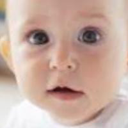

In [7]:
img

In [8]:
#Now, in this directory, we check all the items are files or not(Safety purpose)
fileonly = os.listdir() #Gives all the files in this directory
print(len(fileonly)) #Checking the no. of items in this dir

23708


### The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg
### Male-0 & Female-1

In [9]:
#Checking how to split
fileonly[0].split('_')

['100', '0', '0', '20170112213500903.jpg.chip.jpg']

In [10]:
#So, we extract the 2nd element(gender) as we are trying to classify whether a person is Male/Female.
gender = [file.split('_')[1] for file in fileonly] #Extracting the 2nd element(Gender)

In [11]:
#Just checking
gender[:10]

['0', '0', '1', '1', '1', '1', '1', '1', '1', '1']

In [12]:
#Checking the type of the element in the gender list
type(gender[0])

str

In [13]:
#Gender - 0/1 is in str format...so, we convert them to int
classes = []
for item in gender:
    item = int(item)
    classes.append(item)

In [14]:
#Checking the type of the item in classes
type(classes[0])

int

### Now, Converting Images to Vectors

In [15]:
X_data = []
for file in fileonly:
    face = cv2.imread(file) #Reading an image
    face = cv2.resize(face, (128, 128)) #Resizing an image to 128*128 size
    X_data.append(face) #Appending the resized image to X_data

In [16]:
X = np.squeeze(X_data) #Squeezing the data

In [17]:
X.shape

(23708, 128, 128, 3)

### Normalizing the data

In [18]:
X = X.astype('float32')
X /= 255

In [19]:
#Categorical labels
categorical_labels = to_categorical(classes, num_classes = 2)

In [20]:
categorical_labels[:6]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Data Splitting

In [21]:
#x_train, y_train, x_test, y_test
(x_train , y_train) , (x_test, y_test) = (X[:15008], categorical_labels[:15008]),(X[15008:], categorical_labels[15008:])

#x_valid, y_valid
(x_valid, y_valid) = (x_test[:7000], y_test[:7000])

#x_test, y_test
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [22]:
#Checking the all observations are equal to total obs.
len(x_train) + len(x_test) + len(x_valid) == len(X)

True

### Model Building

In [23]:
#Starting Layers
model = tf.keras.Sequential()

In [24]:
#Adding First layer(Convolutional Layer)
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape = (128, 128, 3)))

In [25]:
#MaxPooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

In [26]:
#Add a DropOut layer to avoid overfitting
model.add(tf.keras.layers.Dropout(0.4))

In [27]:
#2nd Convolutional Layer for better performance
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

In [28]:
#2nd MaxPooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

In [29]:
#2nd DropOut
model.add(tf.keras.layers.Dropout(0.3))

In [30]:
#Flatten Layer
model.add(tf.keras.layers.Flatten())

In [31]:
#Dense
model.add(tf.keras.layers.Dense(256, activation='relu'))
#DropOut
model.add(tf.keras.layers.Dropout(0.5))

In [32]:
#Output Layer
model.add(tf.keras.layers.Dense(2, activation = 'sigmoid'))

In [33]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [34]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
#Training the model on the input data
model.fit(x_train, y_train, batch_size = 64, epochs = 30, validation_data=(x_valid, y_valid))

Train on 15008 samples, validate on 7000 samples
Epoch 1/30
15008/15008 [==============================] - 450s 30ms/sample - loss: 0.5505 - accuracy: 0.7221 - val_loss: 0.4710 - val_accuracy: 0.7999
Epoch 2/30
15008/15008 [==============================] - 426s 28ms/sample - loss: 0.3800 - accuracy: 0.8306 - val_loss: 0.3488 - val_accuracy: 0.8560
Epoch 3/30
15008/15008 [==============================] - 449s 30ms/sample - loss: 0.3360 - accuracy: 0.8514 - val_loss: 0.3288 - val_accuracy: 0.8734
Epoch 4/30
15008/15008 [==============================] - 440s 29ms/sample - loss: 0.3173 - accuracy: 0.8591 - val_loss: 0.2951 - val_accuracy: 0.8817
Epoch 5/30
15008/15008 [==============================] - 434s 29ms/sample - loss: 0.2998 - accuracy: 0.8701 - val_loss: 0.2718 - val_accuracy: 0.8897
Epoch 6/30
15008/15008 [==============================] - 403s 27ms/sample - loss: 0.2897 - accuracy: 0.8737 - val_loss: 0.2651 - val_accuracy: 0.8889
Epoch 7/30
15008/15008 [=====================

In [46]:
# from datetime import datetime
# date = datetime.now()

# datenow = date.ctime()
# naming_model = datenow[9:]

In [47]:
# model_name = naming_model + '.h5'
# model_name.replace(' ', '_')

In [54]:
model.save('model1.h5')

In [55]:
#Evaluate model on Test set
score = model.evaluate(x_test, y_test, verbose = 1)

1700/1700 [==============================] - 29s 17ms/sample - loss: 1.0185 - accuracy: 0.7141


In [59]:
#Print Test Accuracy
print('Test Accuracy::', score[1])

Test Accuracy:: 0.71411765


In [60]:
#Labels
labels = ['Male', 'Female'] #Male - 0, Female - 1

### Predictions

In [61]:
y_pred = model.predict(x_test)

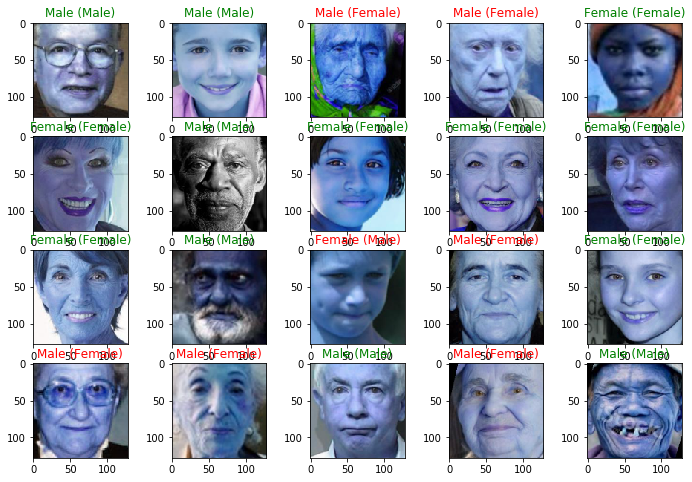

In [73]:
#Plotting a random sample of 20 images, their predicted label and true label
fig = plt.figure(figsize=(12,8))

#Loop through test_set images to get random images
for i, index in enumerate(np.random.choice(x_test.shape[0], size = 20, replace=False)):
    ax = fig.add_subplot(4, 5, i+1)
    
    #Showing each image
    ax.imshow(np.squeeze(x_test[index]))
    pred_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test[index])
    
    #Setting the title for an image
    ax.set_title(f'{labels[pred_index]} ({labels[true_index]})', color=("green" if pred_index == true_index else "red"))
    
plt.show()